### Given two list of x and y coordinates, and a list of errors on y, find the straight line that minimizes the sum of distances between the line and the (x,y) points.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
xdata = np.array([1186.00 - 1001,
1246.00- 1001,
1306.00- 1001,
1366.00- 1001,
1426.00- 1001,
1486.00- 1001,
1546.00- 1001,
1606.00- 1001,
1666.00- 1001,
1726.00- 1001,
1786.00- 1001,
1846.00- 1001])
ydata = np.array([20.42,
20.41,
20.41,
20.40,
20.40,
20.40,
20.39,
20.39,
20.38,
20.38,
20.38,
20.37])
yerr = np.array([0.01,
0.01,
0.01,
0.01,
0.01,
0.01,
0.01,
0.01,
0.01,
0.01,
0.01,
0.01])
if (len(xdata)!=len(ydata)): print ("dimensioni vettori disuguali")
if (len(yerr)!=len(ydata)): print ("dimensioni vettori disuguali")
npoint = len(xdata)
npoint

12

Determiniamo i parametri $a$ and $b$ della retta di best fit $y = b x + a$ che minimizza:
$ \chi^2 = \sum_i \frac{(y_i - b x_i - a)^2}{\sigma_i^2}$
    
$a$ e $b$ sono soluzioni del sistema lineare:
$\begin{bmatrix}
\sum_i \frac{1}{\sigma_i^2} & \sum_i \frac{x_i}{\sigma_i^2}\\
\sum_i \frac{x_i}{\sigma_i^2} & \sum_i \frac{x_i^2}{\sigma_i^2}
\end{bmatrix}$
$\begin{bmatrix} a\\b \end{bmatrix}$ = 
$\begin{bmatrix} \sum_i \frac{y_i}{\sigma_i^2} \\ \sum_i \frac{x_i y_i}{\sigma_i^2}\end{bmatrix}$

In forma matriciale : DA = B quindi A = D^(-1)B

In [7]:
yerrSq = yerr*yerr
sum_one_over_yerrSq = (1./yerrSq).sum()
sum_x_over_yerrSq = (xdata/yerrSq).sum()
sum_xSq_over_yerrSq = (xdata*xdata/yerrSq).sum()
sum_y_over_yerrSq = (ydata/yerrSq).sum()
sum_xy_over_yerrSq = (xdata*ydata/yerrSq).sum()

Calcolo Coefficiente correlazione lineare

In [8]:
sum_x = (xdata).sum()
sum_y = (ydata).sum()
xmean=sum_x/npoint
ymean=sum_y/npoint
ameanx=xdata-xmean
varx = (ameanx*ameanx).sum()
devstx = np.sqrt(varx)
ameany = ydata-ymean
vary = (ameany*ameany).sum()
devsty = np.sqrt(vary)
covxy = (ameanx*ameany).sum()
corrcoeff=covxy/(devstx*devsty)
print ("coefficiente correlazione = ",corrcoeff)

coefficiente correlazione =  -0.980037911664846


In [9]:
matD = np.array([[sum_one_over_yerrSq,sum_x_over_yerrSq],[sum_x_over_yerrSq,sum_xSq_over_yerrSq]])
matD

array([[1.2000e+05, 6.1800e+07],
       [6.1800e+07, 3.6975e+10]])

In [10]:
matD_inv = np.linalg.inv(matD)
matD_inv

array([[ 5.98533411e-05, -1.00038850e-07],
       [-1.00038850e-07,  1.94250194e-10]])

Check D^(-1)D = I

In [11]:
np.dot(matD,matD_inv)

array([[1., 0.],
       [0., 1.]])

In [12]:
matB = np.array([sum_y_over_yerrSq,sum_xy_over_yerrSq])
matB

array([2.4473000e+06, 1.2600085e+09])

In [13]:
np.dot(matD_inv,matB)

array([ 2.04292803e+01, -6.81818182e-05])

Calcolo parametri fit

In [14]:
a, b = np.dot(matD_inv,matB)[0],np.dot(matD_inv,matB)[1]
print (" intercetta a (u.m.)= ", a)
print (" coeff.angolare b (u.m.)= ", b)

 intercetta a (u.m.)=  20.429280303030268
 coeff.angolare b (u.m.)=  -6.818181818180058e-05


Calcolo errori sui parametri

In [15]:
siga, sigb = np.sqrt(matD_inv[0,0]), np.sqrt(matD_inv[1,1])
print (" errore su intercetta siga (u.m.)= ",siga)
print (" errore su coeff.angolare sigb (u.m.)= ",sigb)

 errore su intercetta siga (u.m.)=  0.007736494109306943
 errore su coeff.angolare sigb (u.m.)=  1.3937366833451506e-05


Plot

<ErrorbarContainer object of 3 artists>

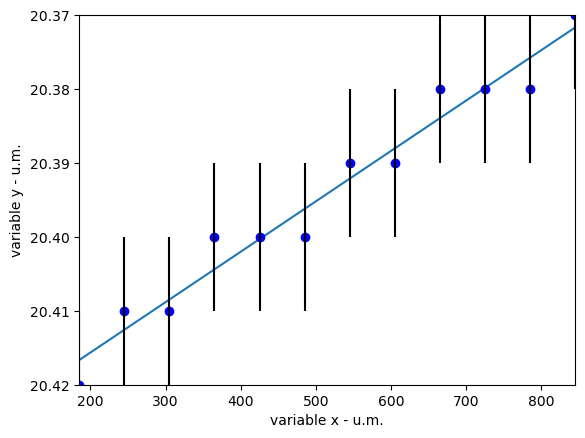

In [18]:
fig, ax = plt.subplots()
ax.set_ylim(20.42,20.37)
ax.set_xlim(1186.00 - 1001, 1846.00- 1001)
ax.set_xlabel('variable x - u.m.')
ax.set_ylabel('variable y - u.m.')
plt.plot(xdata,b*xdata+a,xdata,ydata,'bo')
plt.errorbar(xdata,ydata,yerr=yerr,ecolor='black', ls=" ")

Calcolo X^2 e errore standard della stima

In [17]:
scarto1 = (ydata-a-b*xdata)/yerr
scarto2 = (ydata-a-b*xdata)
chi2 = (scarto1*scarto1).sum()
errstSq = (scarto2*scarto2/(npoint-2)).sum()
errst = np.sqrt(errstSq)
print (" Chi^2 = ",chi2)
print (" errore standard della stima (u.m.) = ",errst)

 Chi^2 =  0.9848484848485775
 errore standard della stima (u.m.) =  0.003138229572304387
